In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models.coherencemodel import CoherenceModel
from bertopic.vectorizers import ClassTfidfTransformer
from sentence_transformers import SentenceTransformer
from gensim.corpora.dictionary import Dictionary
import matplotlib.pyplot as plt
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
import seaborn as sns
import pandas as pd
import numpy as np
import pickle

x:\Kuliah\Semester 8\Sandbox\myenv2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
df = pd.read_csv("../../Data preprocessing/Preprocessed data V2/arxiv_cs_preprocessed_first_semester.csv")
abstracts = df["summary"].to_list()
dates = df["date"].to_list()
ids = df["id"].to_list()

In [ ]:
embedding_model = SentenceTransformer("all-mpnet-base-v2")
embeddings = np.load("../../Topic extraction/abstract embeddings/all-mpnet-base-v2-embeddings V2/cs_embeddings_first_semesterV2.npy")
vectorizer_model = CountVectorizer(stop_words="english", ngram_range=(1,2))
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

In [ ]:
umap_model = UMAP(n_neighbors=10, 
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=42)

In [ ]:
hdbscan_model = HDBSCAN(min_cluster_size=100,
                        metric='euclidean',
                        cluster_selection_method='eom',
                        prediction_data=True)

In [ ]:
topic_model = BERTopic(
    
  embedding_model=embedding_model,
  umap_model=umap_model,
  hdbscan_model=hdbscan_model,
  vectorizer_model=vectorizer_model,
  ctfidf_model=ctfidf_model,

  n_gram_range=(1, 2),
  top_n_words=10,
  nr_topics="auto"
)

# Train model
topics, probs = topic_model.fit_transform(abstracts, embeddings)

# Show topics
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,21947,-1_model_data_task_image,"[model, data, task, image, learning, feature, ...","[['capturing', 'storing', 'image', 'device', '..."
1,0,2703,0_equation_numerical_convergence_problem,"[equation, numerical, convergence, problem, so...","[['article', 'propose', 'two', 'finite', 'elem..."
2,1,2317,1_patient_clinical_medical_disease,"[patient, clinical, medical, disease, segmenta...","[['magnetic', 'resonance', 'imaging', 'mri', '..."
3,2,1726,2_training_supervised_class_pre,"[training, supervised, class, pre, label, shot...","[['shot', 'classification', 'fsc', 'entail', '..."
4,3,1601,3_robot_robotic_manipulation_environment,"[robot, robotic, manipulation, environment, ob...","[['robotic', 'dexterous', 'grasping', 'challen..."
5,4,1275,4_3d_scene_pose_rendering,"[3d, scene, pose, rendering, view, nerf, motio...","[['multi', 'view', 'volumetric', 'rendering', ..."
6,5,1161,5_llm_diffusion_reasoning_knowledge,"[llm, diffusion, reasoning, knowledge, diffusi...","[['recently', 'chatgpt', 'representative', 'la..."
7,6,1043,6_speech_audio_speaker_asr,"[speech, audio, speaker, asr, music, acoustic,...","[['recently', 'end', 'end', 'model', 'widely',..."
8,7,991,7_agent_rl_policy_reward,"[agent, rl, policy, reward, reinforcement, rei...","[['policy', 'represented', 'deep', 'neural', '..."
9,8,894,8_vehicle_traffic_driving_road,"[vehicle, traffic, driving, road, autonomous, ...","[['connected', 'vehicle', 'cv', 'technology', ..."


In [ ]:
new_topics = topic_model.reduce_outliers(abstracts, topics, strategy="c-tf-idf")
topic_model.update_topics(abstracts, topics=new_topics)
topic_model.get_topic_info()

2024-10-16 15:01:39,152 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.


,Topic,Count,Name,Representation,Representative_Docs
0,0,4377,0_problem_method_equation_algorithm,"[problem, method, equation, algorithm, numeric...","[['article', 'propose', 'two', 'finite', 'elem..."
1,1,2750,1_image_medical_patient_model,"[image, medical, patient, model, segmentation,...","[['magnetic', 'resonance', 'imaging', 'mri', '..."
2,2,5424,2_model_training_learning_task,"[model, training, learning, task, method, netw...","[['shot', 'classification', 'fsc', 'entail', '..."
3,3,1864,3_robot_object_environment_task,"[robot, object, environment, task, human, robo...","[['robotic', 'dexterous', 'grasping', 'challen..."
4,4,2547,4_3d_image_scene_method,"[3d, image, scene, method, object, point, pose...","[['multi', 'view', 'volumetric', 'rendering', ..."
5,5,2995,5_model_llm_text_language,"[model, llm, text, language, task, knowledge, ...","[['recently', 'chatgpt', 'representative', 'la..."
6,6,1411,6_speech_audio_speaker_model,"[speech, audio, speaker, model, asr, music, re...","[['recently', 'end', 'end', 'model', 'widely',..."
7,7,1700,7_agent_policy_rl_learning,"[agent, policy, rl, learning, reinforcement, r...","[['policy', 'represented', 'deep', 'neural', '..."
8,8,1122,8_vehicle_driving_traffic_autonomous,"[vehicle, driving, traffic, autonomous, road, ...","[['connected', 'vehicle', 'cv', 'technology', ..."
9,9,1232,9_channel_communication_ri_wireless,"[channel, communication, ri, wireless, signal,...","[['reconfigurable', 'intelligent', 'surface', ..."


In [ ]:
def calculate_coherence_score(model, abstracts, topics):
    documents = pd.DataFrame({"Abstracts": abstracts, "ID": range(len(abstracts)), "Topic": topics})
    documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Abstracts': ' '.join})

    analyzer = model.vectorizer_model.build_analyzer()
    tokens = [analyzer(doc) for doc in documents_per_topic.Abstracts]

    dictionary = Dictionary(tokens)
    corpus = [dictionary.doc2bow(token) for token in tokens]

    topic_words = [[word for word, _ in model.get_topic(topic)] for topic in range(len(set(topics))-1)]

    coherence_model = CoherenceModel(topics=topic_words, texts=tokens, corpus=corpus, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model.get_coherence()
    
    return coherence

In [ ]:
coherence = calculate_coherence_score(topic_model, abstracts, new_topics)
print(coherence)

0.7336650927847712


In [ ]:
topic_model.visualize_topics()

In [ ]:
with open('cs_first_topics_over_time.pkl', 'rb') as f:
    topics_over_time = pickle.load(f)

topics_over_time_df = pd.DataFrame(topics_over_time, columns=["Topic", "Timestamp", "Frequency"])

# Convert the 'Timestamp' column to a datetime object for easier grouping
topics_over_time_df['Timestamp'] = pd.to_datetime(topics_over_time_df['Timestamp'])

# Group by month and topic, summing only the 'Frequency' column
monthly_data = topics_over_time_df.groupby([topics_over_time_df['Timestamp'].dt.to_period('M'), 'Topic'])['Frequency'].sum().reset_index()

In [9]:
topic_labels = {
    0:'Numerical methods and optimization',
    1:'Medical imaging and segmentation',
    2:'Image related machine learning models and performance',
    3:'Robotics and human-robot interaction',
    4:'3D object detection and pose estimation',
    5:'Large language models and text generation',
    6:'Speech and audio processing',
    7:'Reinforcement Learning (RL) agents',
    8:'Autonomous vehicles and traffic system',
    9:'Wireless communication systems',
    10:'Graph Neural Networks (GNNs)',
    11:'Software engineering and development tools',
    12:'Social media analytics',
    13:'Multilingual Natural Language Processing (NLP)',
    14:'Control theory and dynamic systems',
    15:'Quantum computing',
    16:'Federated learning and privacy',
    17:'Unmanned Aerial Vehicles (UAVs)',
    18:'Power grids and energy system',
    19:'Graph theory and algorithms',
    20:'Internet of Things (IoT) applications',
    21:'User recommendation systems',
    22:'Blockchain and smart contracts',
    23:'Bioinformatics and protein modeling',
    24:'Logic and formal verification',
    25:'Adversarial attacks',
    26:'Time series forecasting',
    27:'AI systems and Human-AI interaction',
    28:'Scientometrics and research analysis',
    29:'Data privacy and synthetic datasets',
    30:'Game theory and nash equilibrium',
    31:'Clustering algorithm',
    32:'Coding theory and combinatorial optimization',
    33:'Cryptography and encryption',
    34:'High performance computing',   
    35:'AI intergration in education',
    36:'Causal Inference and Causal Models',
    37:'Generative models (GANs)',
    38:'Cybersecurity and threat detection',
    39:'Video processing and temporal features',
    40:'Machine learning application in astrophysics and space exploration',
    41:'Spiking Neural Networks (SNNs)',   
    42:'Auction theory and mechanism design',
    43:'LiDAR-based mapping and 3D localization',
    44:'Financial and stock market modelling',
    45:'Anomaly detection',
    46:'Fairness in multi-agent systems',
    47:'Agricultural modelling',
    48:'Fault and safety systems in CPS'
}

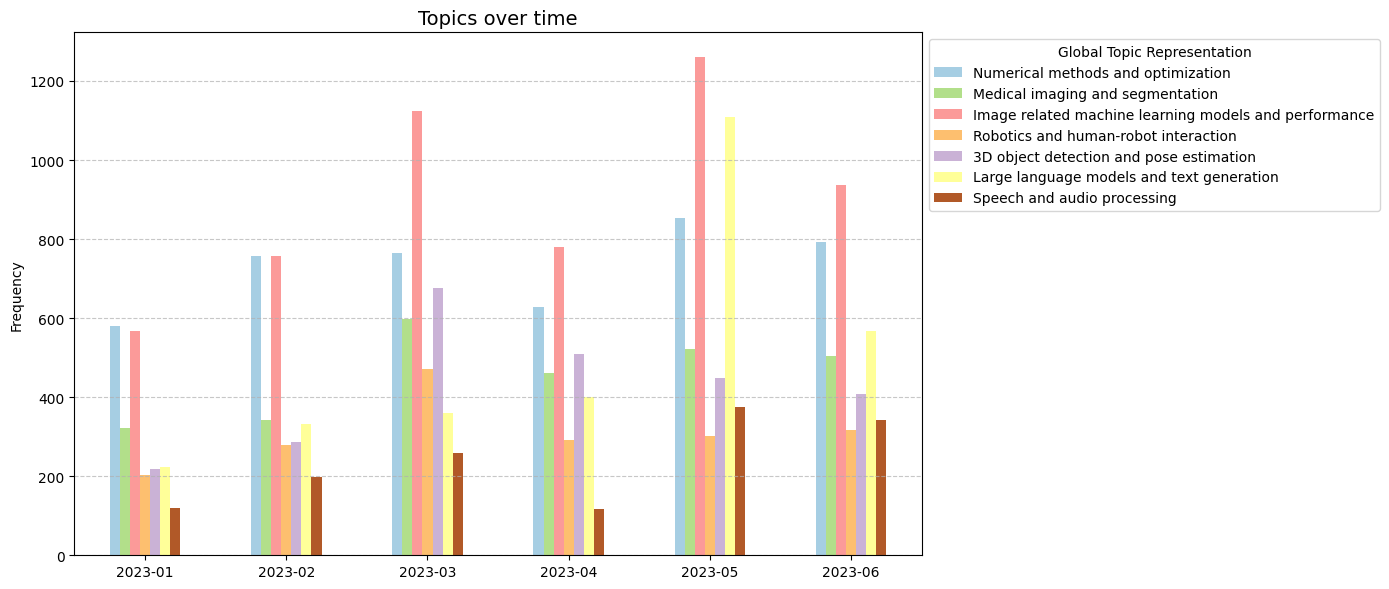

In [10]:
specific_topics = [0,1,2,3,4,5,6]

# Filter monthly_data to include only these specific topics
filtered_monthly_data = monthly_data[monthly_data['Topic'].isin(specific_topics)]

# Pivot the table to make it suitable for bar plotting (topics as columns)
pivoted_data = filtered_monthly_data.pivot(index='Timestamp', columns='Topic', values='Frequency')

# Plot as stacked bar chart
ax = pivoted_data.plot(kind='bar', stacked=False, figsize=(14, 6), colormap='Paired')

# Add legend outside the plot
ax.legend(title='Global Topic Representation', labels=[topic_labels.get(topic, topic) for topic in pivoted_data.columns],  bbox_to_anchor=(1, 1), loc='upper left')

# Customize the plot (similar to your image)
ax.set_title('Topics over time', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Frequency')

# Rotate x-axis labels for better readability
ax.set_xticklabels(pivoted_data.index.astype(str), rotation=0)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit everything well
plt.tight_layout()

# Show the plot
plt.show()

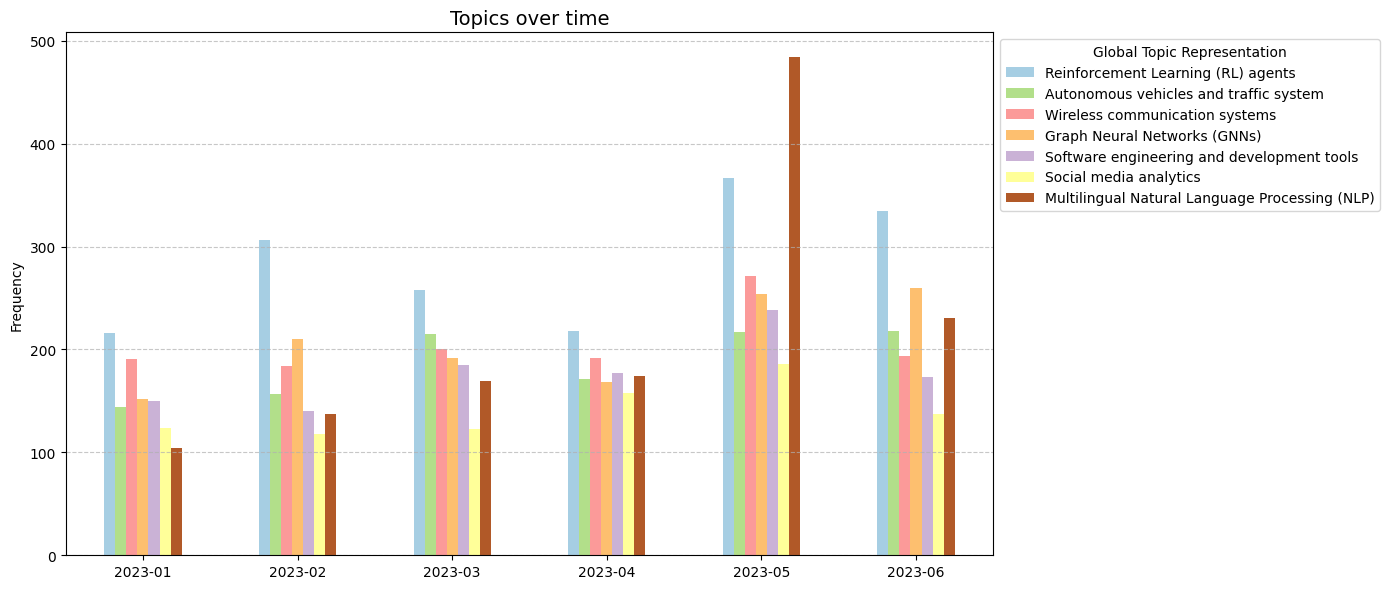

In [11]:
specific_topics = [7,8,9,10,11,12,13]

# Filter monthly_data to include only these specific topics
filtered_monthly_data = monthly_data[monthly_data['Topic'].isin(specific_topics)]

# Pivot the table to make it suitable for bar plotting (topics as columns)
pivoted_data = filtered_monthly_data.pivot(index='Timestamp', columns='Topic', values='Frequency')

# Plot as stacked bar chart
ax = pivoted_data.plot(kind='bar', stacked=False, figsize=(14, 6), colormap='Paired')

# Add legend outside the plot
ax.legend(title='Global Topic Representation', labels=[topic_labels.get(topic, topic) for topic in pivoted_data.columns],  bbox_to_anchor=(1, 1), loc='upper left')

# Customize the plot (similar to your image)
ax.set_title('Topics over time', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Frequency')

# Rotate x-axis labels for better readability
ax.set_xticklabels(pivoted_data.index.astype(str), rotation=0)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit everything well
plt.tight_layout()

# Show the plot
plt.show()

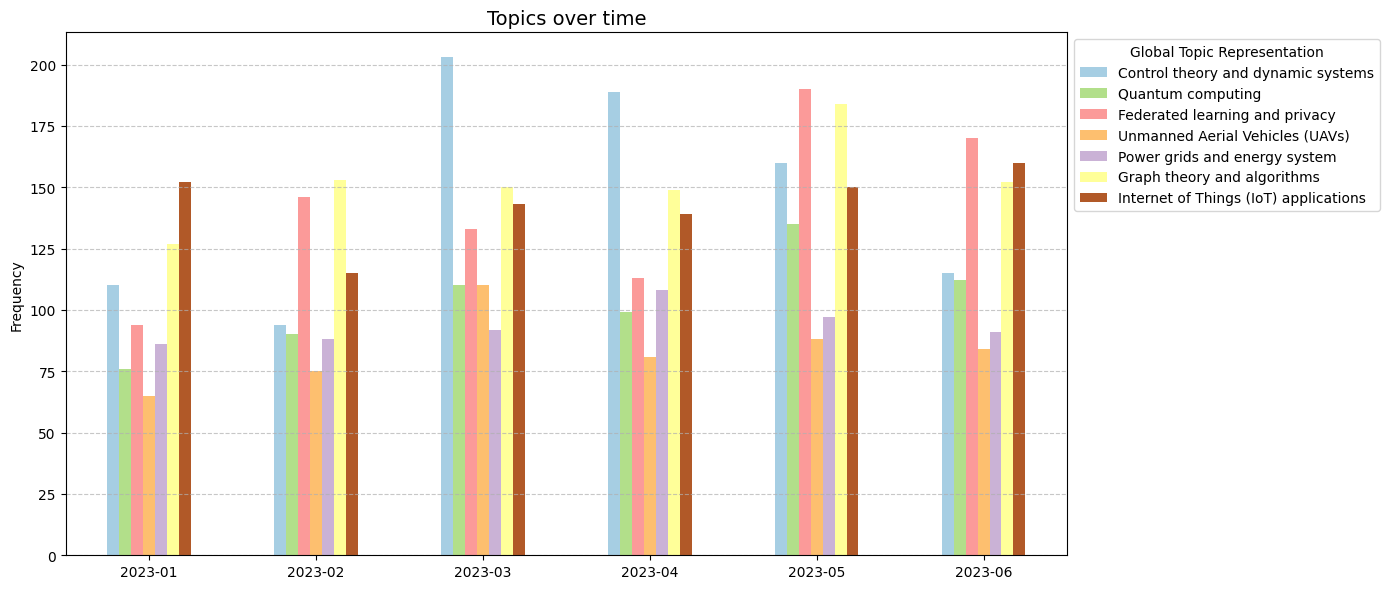

In [12]:
specific_topics = [14,15,16,17,18,19,20]

# Filter monthly_data to include only these specific topics
filtered_monthly_data = monthly_data[monthly_data['Topic'].isin(specific_topics)]

# Pivot the table to make it suitable for bar plotting (topics as columns)
pivoted_data = filtered_monthly_data.pivot(index='Timestamp', columns='Topic', values='Frequency')

# Plot as stacked bar chart
ax = pivoted_data.plot(kind='bar', stacked=False, figsize=(14, 6), colormap='Paired')

# Add legend outside the plot
ax.legend(title='Global Topic Representation', labels=[topic_labels.get(topic, topic) for topic in pivoted_data.columns],  bbox_to_anchor=(1, 1), loc='upper left')

# Customize the plot (similar to your image)
ax.set_title('Topics over time', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Frequency')

# Rotate x-axis labels for better readability
ax.set_xticklabels(pivoted_data.index.astype(str), rotation=0)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit everything well
plt.tight_layout()

# Show the plot
plt.show()

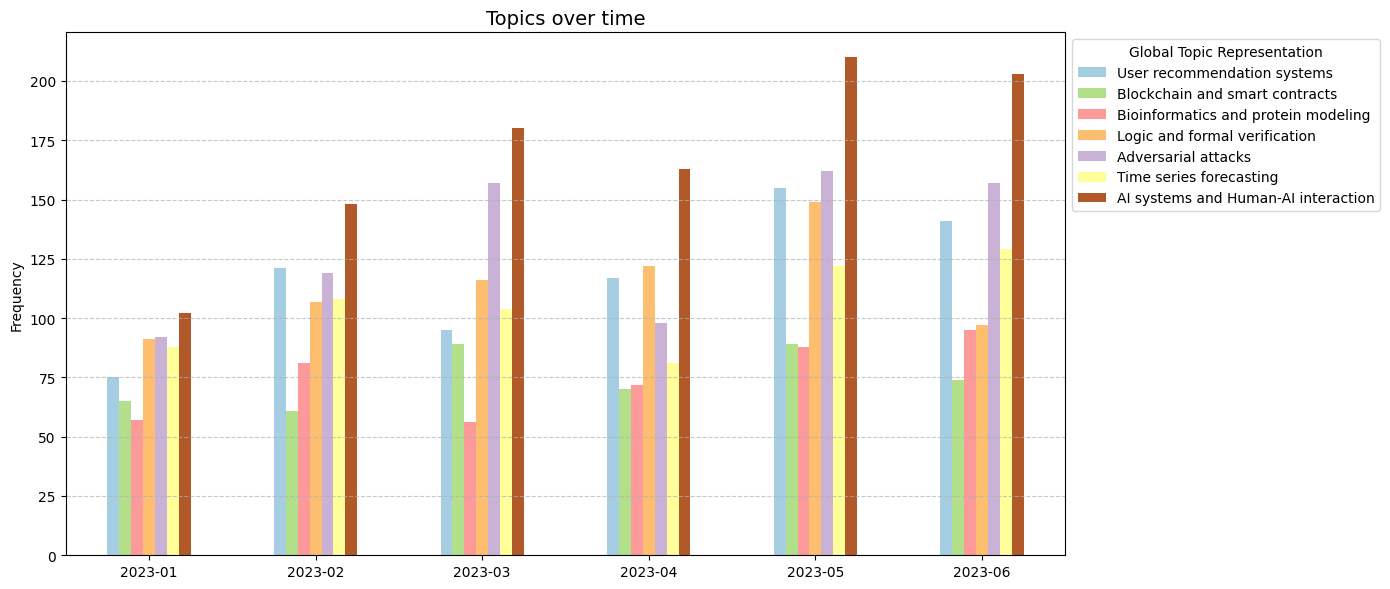

In [13]:
specific_topics = [21,22,23,24,25,26,27]

# Filter monthly_data to include only these specific topics
filtered_monthly_data = monthly_data[monthly_data['Topic'].isin(specific_topics)]

# Pivot the table to make it suitable for bar plotting (topics as columns)
pivoted_data = filtered_monthly_data.pivot(index='Timestamp', columns='Topic', values='Frequency')

# Plot as stacked bar chart
ax = pivoted_data.plot(kind='bar', stacked=False, figsize=(14, 6), colormap='Paired')

# Add legend outside the plot
ax.legend(title='Global Topic Representation', labels=[topic_labels.get(topic, topic) for topic in pivoted_data.columns],  bbox_to_anchor=(1, 1), loc='upper left')

# Customize the plot (similar to your image)
ax.set_title('Topics over time', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Frequency')

# Rotate x-axis labels for better readability
ax.set_xticklabels(pivoted_data.index.astype(str), rotation=0)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit everything well
plt.tight_layout()

# Show the plot
plt.show()

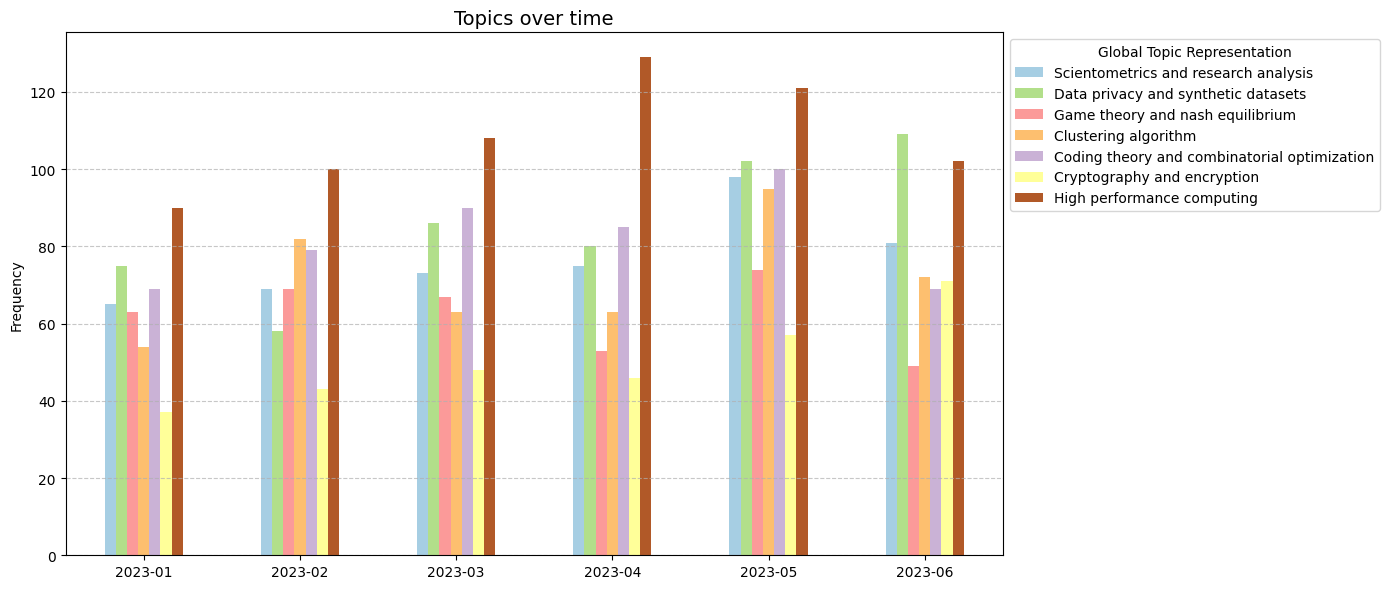

In [14]:
specific_topics = [28,29,30,31,32,33,34]

# Filter monthly_data to include only these specific topics
filtered_monthly_data = monthly_data[monthly_data['Topic'].isin(specific_topics)]

# Pivot the table to make it suitable for bar plotting (topics as columns)
pivoted_data = filtered_monthly_data.pivot(index='Timestamp', columns='Topic', values='Frequency')

# Plot as stacked bar chart
ax = pivoted_data.plot(kind='bar', stacked=False, figsize=(14, 6), colormap='Paired')

# Add legend outside the plot
ax.legend(title='Global Topic Representation', labels=[topic_labels.get(topic, topic) for topic in pivoted_data.columns],  bbox_to_anchor=(1, 1), loc='upper left')

# Customize the plot (similar to your image)
ax.set_title('Topics over time', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Frequency')

# Rotate x-axis labels for better readability
ax.set_xticklabels(pivoted_data.index.astype(str), rotation=0)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit everything well
plt.tight_layout()

# Show the plot
plt.show()

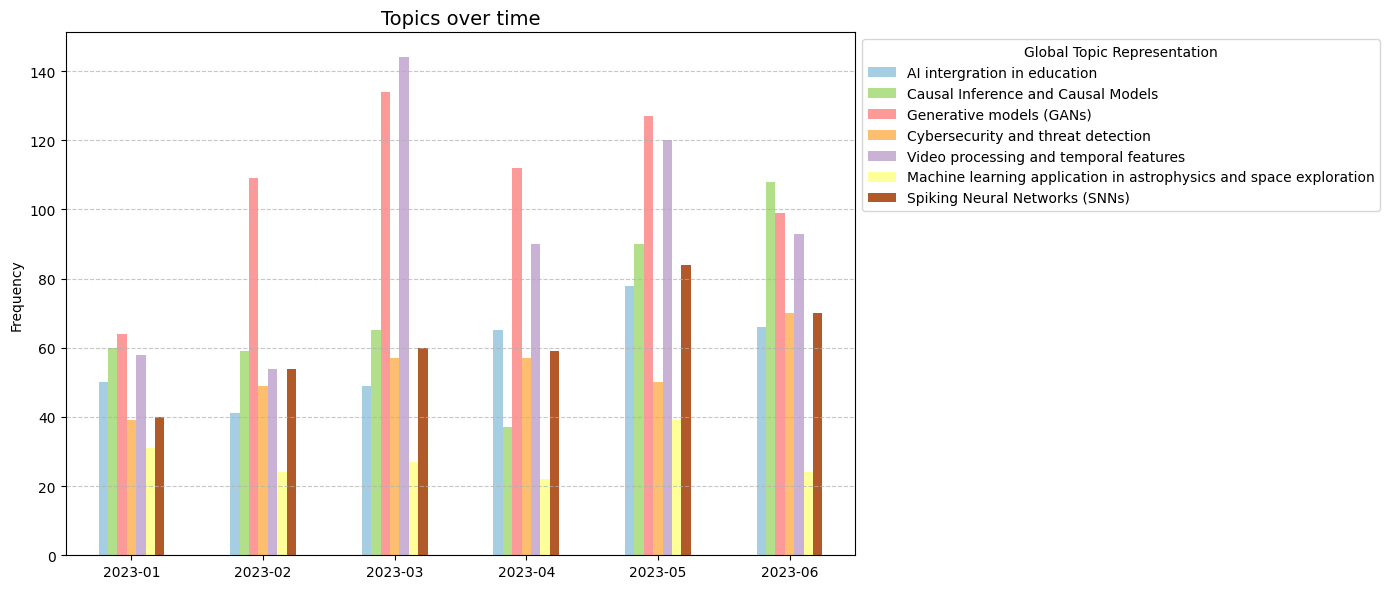

In [15]:
specific_topics = [35,36,37,38,39,40,41]

# Filter monthly_data to include only these specific topics
filtered_monthly_data = monthly_data[monthly_data['Topic'].isin(specific_topics)]

# Pivot the table to make it suitable for bar plotting (topics as columns)
pivoted_data = filtered_monthly_data.pivot(index='Timestamp', columns='Topic', values='Frequency')

# Plot as stacked bar chart
ax = pivoted_data.plot(kind='bar', stacked=False, figsize=(14, 6), colormap='Paired')

# Add legend outside the plot
ax.legend(title='Global Topic Representation', labels=[topic_labels.get(topic, topic) for topic in pivoted_data.columns],  bbox_to_anchor=(1, 1), loc='upper left')

# Customize the plot (similar to your image)
ax.set_title('Topics over time', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Frequency')

# Rotate x-axis labels for better readability
ax.set_xticklabels(pivoted_data.index.astype(str), rotation=0)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit everything well
plt.tight_layout()

# Show the plot
plt.show()

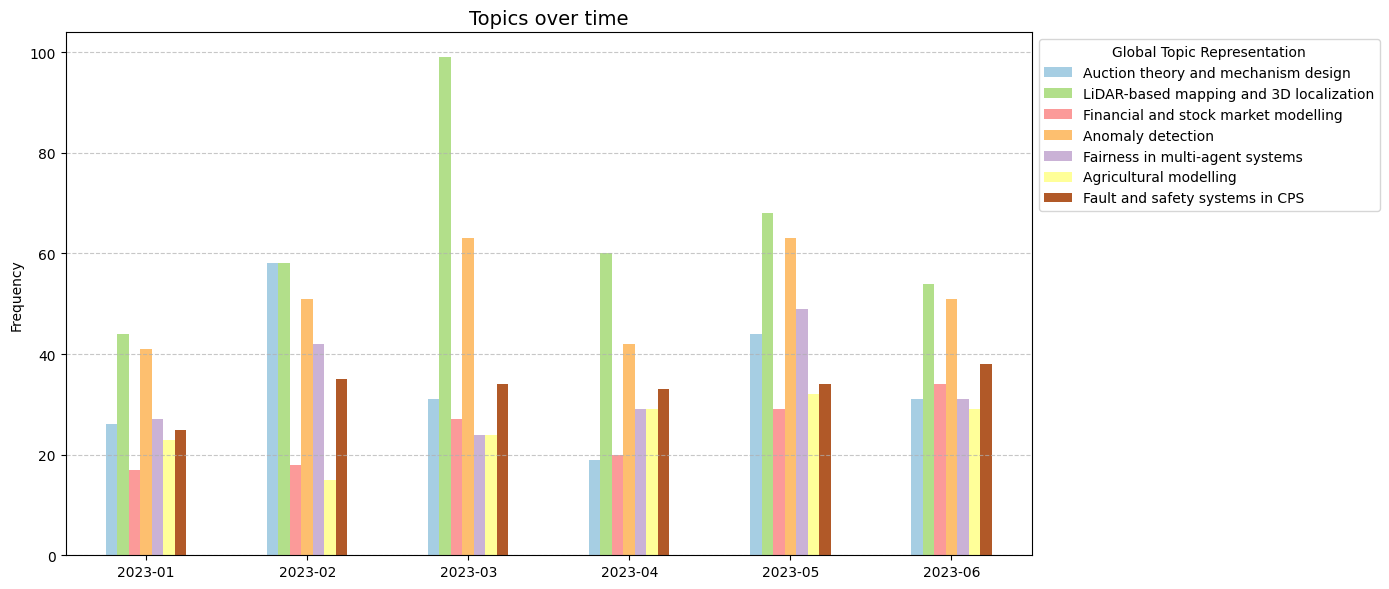

In [16]:
specific_topics = [42,43,44,45,46,47,48]

# Filter monthly_data to include only these specific topics
filtered_monthly_data = monthly_data[monthly_data['Topic'].isin(specific_topics)]

# Pivot the table to make it suitable for bar plotting (topics as columns)
pivoted_data = filtered_monthly_data.pivot(index='Timestamp', columns='Topic', values='Frequency')

# Plot as stacked bar chart
ax = pivoted_data.plot(kind='bar', stacked=False, figsize=(14, 6), colormap='Paired')

# Add legend outside the plot
ax.legend(title='Global Topic Representation', labels=[topic_labels.get(topic, topic) for topic in pivoted_data.columns],  bbox_to_anchor=(1, 1), loc='upper left')

# Customize the plot (similar to your image)
ax.set_title('Topics over time', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Frequency')

# Rotate x-axis labels for better readability
ax.set_xticklabels(pivoted_data.index.astype(str), rotation=0)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit everything well
plt.tight_layout()

# Show the plot
plt.show()